# SymPy

SymPy 是一个由 Python 语言编写的符号计算库。我将在本文中简要地介绍如何利用 SymPy 进行符号计算。

https://zhuanlan.zhihu.com/p/111573239

`pip install sympy`

In [42]:
import numpy as np
import sympy

In [43]:
dir(sympy)

['Abs',
 'AccumBounds',
 'Add',
 'Adjoint',
 'AlgebraicField',
 'AlgebraicNumber',
 'And',
 'AppliedPredicate',
 'Array',
 'AssumptionsContext',
 'Atom',
 'AtomicExpr',
 'BasePolynomialError',
 'Basic',
 'BlockDiagMatrix',
 'BlockMatrix',
 'CC',
 'CRootOf',
 'Catalan',
 'Chi',
 'Ci',
 'Circle',
 'CoercionFailed',
 'Complement',
 'ComplexField',
 'ComplexRegion',
 'ComplexRootOf',
 'Complexes',
 'ComputationFailed',
 'ConditionSet',
 'Contains',
 'CosineTransform',
 'Curve',
 'DeferredVector',
 'DenseNDimArray',
 'Derivative',
 'Determinant',
 'DiagMatrix',
 'DiagonalMatrix',
 'DiagonalOf',
 'Dict',
 'DiracDelta',
 'DisjointUnion',
 'Domain',
 'DomainError',
 'DotProduct',
 'Dummy',
 'E',
 'E1',
 'EPath',
 'EX',
 'EXRAW',
 'Ei',
 'Eijk',
 'Ellipse',
 'EmptySequence',
 'EmptySet',
 'Eq',
 'Equality',
 'Equivalent',
 'EulerGamma',
 'EvaluationFailed',
 'ExactQuotientFailed',
 'Expr',
 'ExpressionDomain',
 'ExtraneousFactors',
 'FF',
 'FF_gmpy',
 'FF_python',
 'FU',
 'FallingFactorial',
 '

在 SymPy 中，我们用 'oo' 表示 ♾️


# 基本函数

## symbols 生成符号

In [44]:
x, y, z = sympy.symbols("x y z")
x, y, z

(x, y, z)

## Rational 构造分数 1/2

In [45]:
sympy.Rational(1, 2)

1/2

## subs 未知数替换

In [46]:
expr = sympy.cos(x) + 1
expr

cos(x) + 1

In [47]:
expr.subs(x, 0)

2

## evalf 转换为指定精度的数值解

In [48]:
sympy.pi

pi

In [49]:
sympy.pi.evalf(3)

3.14

## lambdify 将 SymPy 表达式转换为 NumPy 可使用的函数

In [50]:
expr = sympy.sin(x)
expr

sin(x)

In [51]:
f = sympy.lambdify(x, expr, "numpy")
f

<function _lambdifygenerated(x)>

In [52]:
# numpy计算
f(np.pi / 3)

0.8660254037844386

In [53]:
# sympy符号计算
expr.subs(x, sympy.pi / 3)

sqrt(3)/2

## simplify (化简)

In [54]:
sympy.simplify(2 * (x + 1) + (x + 1) ** 2)

x**2 + 4*x + 3

In [55]:
sympy.simplify(sympy.sin(x) ** 2 + sympy.cos(x) ** 2)

1

## sympify 将字符串表达式转换为 SymPy 表达式

In [56]:
sympy.simplify("x ** 2 + 2 * x + 1")

x**2 + 2*x + 1

## expand 展开函数

In [57]:
expr = (x + 1) ** 2
expr

(x + 1)**2

In [58]:
sympy.expand(expr)

x**2 + 2*x + 1

## factor 因式分解 逆expand

In [59]:
sympy.factor(x**2 - 2 * x + 1)

(x - 1)**2

In [60]:
sympy.factor(x**2 + 2 * x + 1)

(x + 1)**2

In [61]:
sympy.factor(x**3 - x**2 + x - 1)

(x - 1)*(x**2 + 1)

## collect 合并同类项

In [62]:
expr = x * y + x - 3 + 2 * x**2 - z * x**2 + x**3
expr

x**3 - x**2*z + 2*x**2 + x*y + x - 3

In [63]:
sympy.collect(expr, x)

x**3 + x**2*(2 - z) + x*(y + 1) - 3

## cancel 有理分式化简

消去分子分母的公因式使用 cancel 函数

In [64]:
expr = (x**2 + 2 * x + 1) / (x**2 + x)
expr

(x**2 + 2*x + 1)/(x**2 + x)

In [65]:
sympy.cancel(expr)

(x + 1)/x

## apart 部分分式展开

In [66]:
expr = (4 * x**3 + 21 * x**2 + 10 * x + 12) / (x**4 + 5 * x**3 + 5 * x**2 + 4 * x)
expr

(4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)

In [67]:
sympy.apart(expr)

(2*x - 1)/(x**2 + x + 1) - 1/(x + 4) + 3/x

# 微积分符号计算

## diff 求导数

### 一元函数求导

In [68]:
sympy.diff(sympy.sin(x), x)

cos(x)

In [69]:
expr = sympy.cos(x)
expr

cos(x)

In [70]:
sympy.diff(expr, x)

-sin(x)

### 多元函数求偏导

In [71]:
z

z

In [74]:
expr = x**2 + x * y + x / z + 1
expr

x**2 + x*y + x/z + 1

In [79]:
sympy.diff(expr, x)

2*x + y + 1/z

In [76]:
sympy.diff(expr, y)

x

In [77]:
sympy.diff(expr, z)

-x/z**2

In [80]:
sympy.diff(expr, [x, y])

Derivative(x**2 + x*y + x/z + 1, (x, y))

In [83]:
sympy.diff(expr, [y, x])

Derivative(x**2 + x*y + x/z + 1, (y, x))

In [86]:
sympy.diff(expr, [x, z])

Derivative(x**2 + x*y + x/z + 1, (x, z))

In [87]:
sympy.diff(expr, [z, x])

Derivative(x**2 + x*y + x/z + 1, (z, x))

In [88]:
sympy.diff(expr, [y, z])

Derivative(x**2 + x*y + x/z + 1, (y, z))

In [89]:
sympy.diff(expr, [z, y])

Derivative(x**2 + x*y + x/z + 1, (z, y))

## integrate 积分

### 不定积分

In [97]:
expr = sympy.cos(x)
expr

cos(x)

In [98]:
sympy.integrate(expr, x)

sin(x)

In [99]:
expr = -sympy.sin(x)
expr

-sin(x)

In [100]:
sympy.integrate(expr, x)

cos(x)

### 定积分

In [102]:
expr

-sin(x)

In [112]:
#                        范围
sympy.integrate(expr, (x, -1, 1))

0

In [113]:
sympy.integrate(expr, (x, 0, sympy.pi))

-2

In [114]:
sympy.integrate(expr, (x, 0, "oo"))

AccumBounds(-2, 0)

### 二重积分

In [147]:
expr = sympy.E ** (-(x**2) - y**2)
expr

exp(-x**2 - y**2)

In [148]:
sympy.integrate(expr, (x, "-oo", "oo"))

sqrt(pi)*exp(-y**2)

In [119]:
sympy.integrate(expr, (x, "-oo", "oo"), (y, "-oo", "oo"))

pi

In [146]:
expr.integrate((x, -1, 1), (y, -1, 1))

nan

## limit 求极限

In [149]:
expr = sympy.sin(x) / x
expr

sin(x)/x

In [150]:
sympy.limit(expr, x, 0)

1

In [152]:
sympy.limit(expr, x, "oo")

0

In [153]:
expr = 1 / x
expr

1/x

In [154]:
sympy.limit(expr, x, "oo")

0

In [155]:
sympy.limit(expr, x, "-oo")

0

In [156]:
# 无限接近于0
sympy.limit(expr, x, 0, "+")

oo

In [157]:
# 无限接近于0
sympy.limit(expr, x, 0, "-")

-oo

## series 级数展开

In [158]:
expr = sympy.sin(x)
expr

sin(x)

In [159]:
# 在 x=0 处进行 4 阶展开
sympy.series(expr, x, 0, 4)

x - x**3/6 + O(x**4)

# 解方程

## Eq Ge Gt Le Lt, 构造方程

In [231]:
expr = sympy.Eq(x**2 - x, 0)
expr

Eq(x**2 - x, 0)

In [232]:
sympy.Ge(x**2 - x, 0)

x**2 - x >= 0

In [233]:
sympy.Gt(x**2 - x, 0)

x**2 - x > 0

In [234]:
sympy.Le(x**2 - x, 0)

x**2 - x <= 0

In [238]:
sympy.Lt(x**2 - x, 0)

x**2 - x < 0

## solveset 求解一元方程

In [236]:
# 以代数方式求解方程和方程组
sympy.solve(expr)

[0, 1]

In [237]:
# 以集合作为输出求解给定的不等式或方程
sympy.solveset(expr)

{0, 1}

## dsolve 求解微分方程

In [166]:
f = sympy.symbols("f", cls=sympy.Function)
f

f

In [167]:
diffeq = sympy.Eq(f(x).diff(x, 2) - 2 * f(x).diff(x) + f(x), sympy.sin(x))
diffeq

Eq(f(x) - 2*Derivative(f(x), x) + Derivative(f(x), (x, 2)), sin(x))

In [168]:
sympy.dsolve(diffeq, f(x))

Eq(f(x), (C1 + C2*x)*exp(x) + cos(x)/2)

# 矩阵

## basic

In [171]:
sympy.Matrix([[1, -1], [3, 4], [0, 2]])

Matrix([
[1, -1],
[3,  4],
[0,  2]])

In [180]:
# 转置
sympy.Matrix([[1, -1], [3, 4], [0, 2]]).T

Matrix([
[ 1, 3, 0],
[-1, 4, 2]])

In [173]:
# 构造列向量
sympy.Matrix([1, 2, 3])

Matrix([
[1],
[2],
[3]])

In [174]:
# 构造行向量
# 矩阵转置用矩阵变量的 T 方法
sympy.Matrix([1, 2, 3]).T

Matrix([[1, 2, 3]])

In [175]:
# 构造单位矩阵
sympy.eye(4)

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [177]:
# 构造0矩阵
sympy.zeros(4)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [178]:
# 构造1矩阵
sympy.ones(4)

Matrix([
[1, 1, 1, 1],
[1, 1, 1, 1],
[1, 1, 1, 1],
[1, 1, 1, 1]])

In [179]:
# 构造对角矩阵
sympy.diag(1, 2, 3, 4)

Matrix([
[1, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 3, 0],
[0, 0, 0, 4]])

## 求矩阵的幂

In [182]:
M = sympy.Matrix([[1, 3], [-2, 3]])
M

Matrix([
[ 1, 3],
[-2, 3]])

### n 次幂

In [183]:
M**2

Matrix([
[-5, 12],
[-8,  3]])

In [184]:
M**3

Matrix([
[-29,  21],
[-14, -15]])

### 特殊地，矩阵的 -1 次幂就是矩阵的逆

In [185]:
M**-1

Matrix([
[1/3, -1/3],
[2/9,  1/9]])

## det 求矩阵的行列式

In [191]:
M = sympy.Matrix(
    [
        [
            2,
            4,
        ],
        [1, 3],
    ]
)
M

Matrix([
[2, 4],
[1, 3]])

In [192]:
sympy.det(M)

2

In [193]:
sympy.Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]]).det()

-1

## eigenvals 求矩阵的特征值

In [194]:
M = sympy.Matrix([[3, -2, 4, -2], [5, 3, -3, -2], [5, -2, 2, -2], [5, -2, -3, 3]])
M

Matrix([
[3, -2,  4, -2],
[5,  3, -3, -2],
[5, -2,  2, -2],
[5, -2, -3,  3]])

In [196]:
M.eigenvals()

{3: 1, -2: 1, 5: 2}

## charpoly 求特征多项式

In [201]:
lamda = sympy.symbols("lamda")
lamda

lamda

In [202]:
p = M.charpoly(lamda)
p

PurePoly(lamda**4 - 11*lamda**3 + 29*lamda**2 + 35*lamda - 150, lamda, domain='ZZ')

In [203]:
sympy.factor(p)

PurePoly(lamda**4 - 11*lamda**3 + 29*lamda**2 + 35*lamda - 150, lamda, domain='ZZ')

# Laplace 变换

## laplace_transform Laplace变换

In [204]:
expr = sympy.sin(x)
expr

sin(x)

In [206]:
sympy.laplace_transform(expr, x, y)

(1/(y**2 + 1), 0, True)

## inverse_laplace_transform 逆Laplace变换

In [208]:
expr = 1 / (y**2 + 1)
expr

1/(y**2 + 1)

In [210]:
sympy.inverse_laplace_transform(expr, y, x)

sin(x)*Heaviside(x)

# SymPy 画函数图像

## plot 画图

In [211]:
expr = x**2
expr

x**2

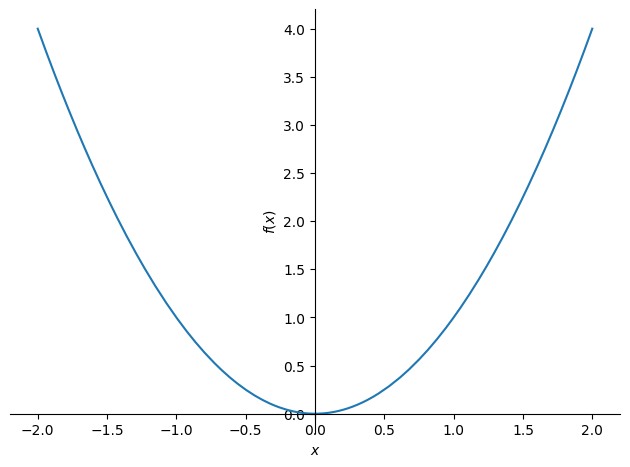

In [212]:
sympy.plot(expr, (x, -2, 2))

## plot_implicit 绘制隐函数图像

In [213]:
expr = sympy.Eq(x**2 + y**2, 1)
expr

Eq(x**2 + y**2, 1)

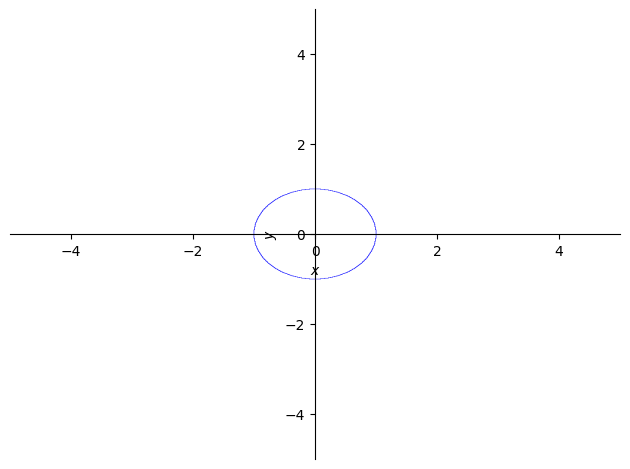

In [216]:
sympy.plot_implicit(expr)
# x, y轴不是1:1

## plot3d 3d画图

In [217]:
expr = x * sympy.exp(-(x**2) - y**2)
expr

x*exp(-x**2 - y**2)

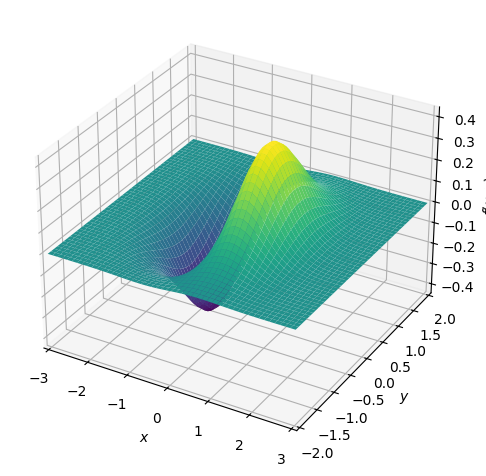

In [218]:
sympy.plotting.plot3d(expr, (x, -3, 3), (y, -2, 2))

# 转换代码为LaTeX

In [219]:
sympy.latex(x**2)

'x^{2}'

In [221]:
sympy.print_latex(x**2)

x^{2}


In [222]:
sympy.print_latex(1 / (1 + sympy.exp(-x)))

\frac{1}{1 + e^{- x}}
